TEXT:  
I en skog av tall, der kurver bor,  
En granskog av plott som aldri forgår.  
Med røtter av sinus og stammer av cos,  
De svever i luft, helt uten trods.  

Kvister av lykke og blader av pi,  
Matematikken er som magi.  
Vi plotter det sammen, et kunstverk på skjerm,  
En verden, litt tilfeldig, hvor alt er vår term.  

CODE:
```python
import numpy as np
import matplotlib.pyplot as plt

# Parameter for plottet
x = np.linspace(-10, 10, 1000)

# Mathematisk representasjon av diktet
y1 = np.sin(x)  # Røtter av sinus, skogbunnen
y2 = np.cos(x)  # Stammer av cos, himmelens linjer
y3 = np.sin(x) + np.cos(x)  # Kvister og blader i tallskogen

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label="Sin(x) - Røtter av sinus", color='green')
plt.plot(x, y2, label="Cos(x) - Stammer av cos", color='blue')
plt.plot(x, y3, label="Sin(x) + Cos(x) - Kvister og blader", color='orange')

# Legg til dekor
plt.title("En Tilfeldig Matematisk Skog")
plt.xlabel("x - Tiden som går")
plt.ylabel("

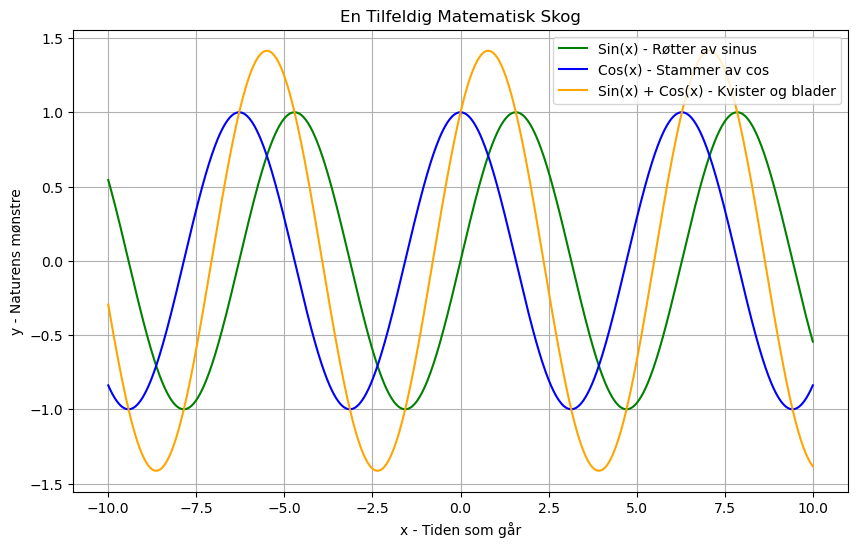

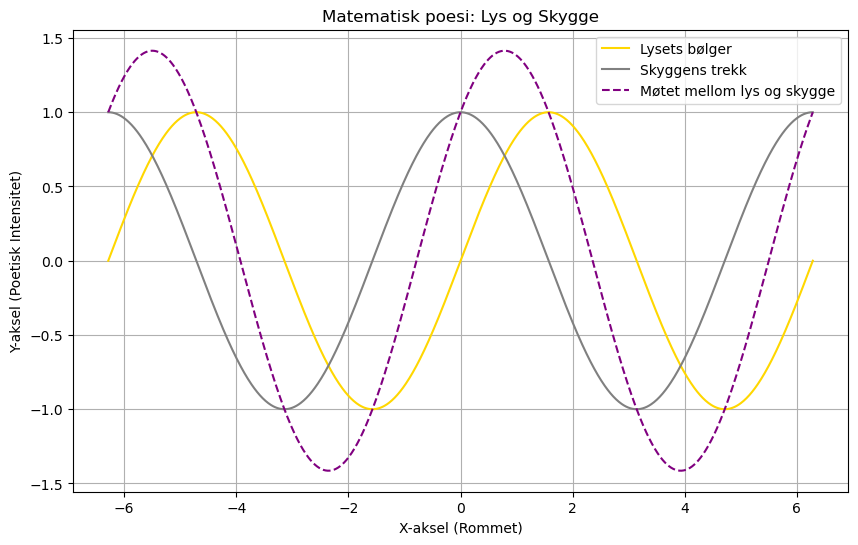

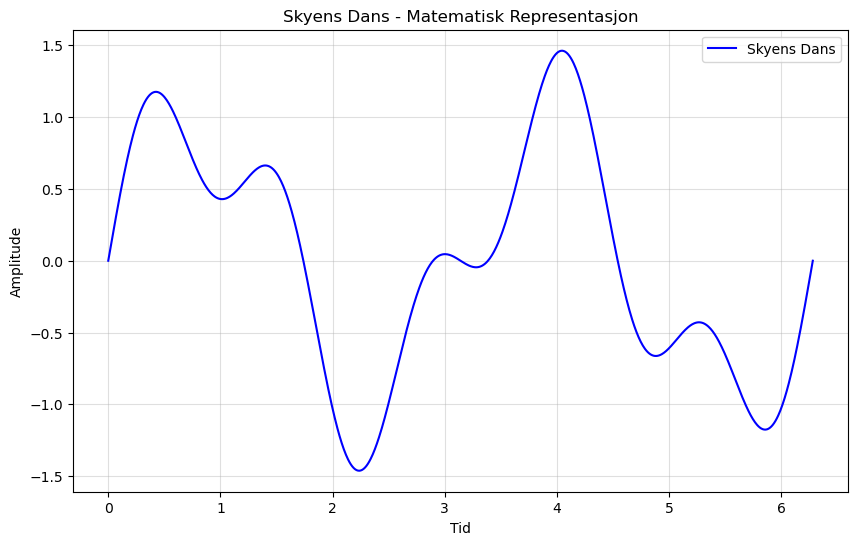

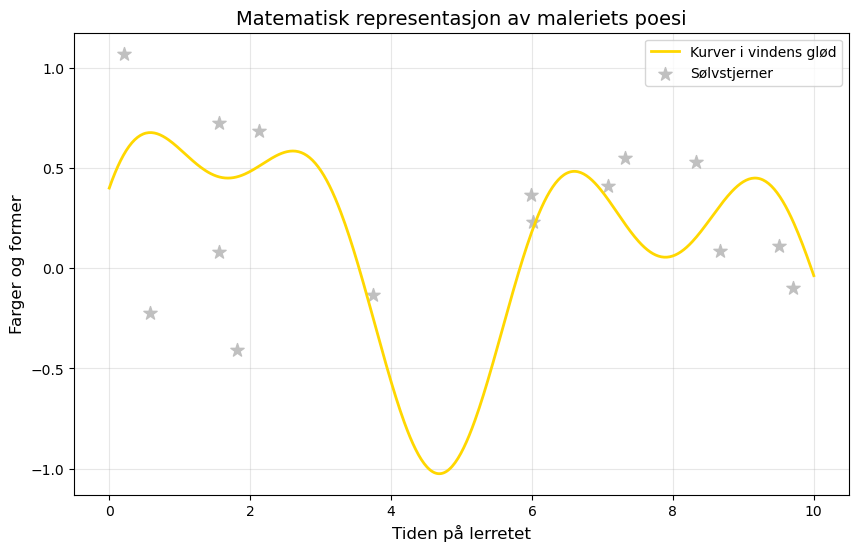

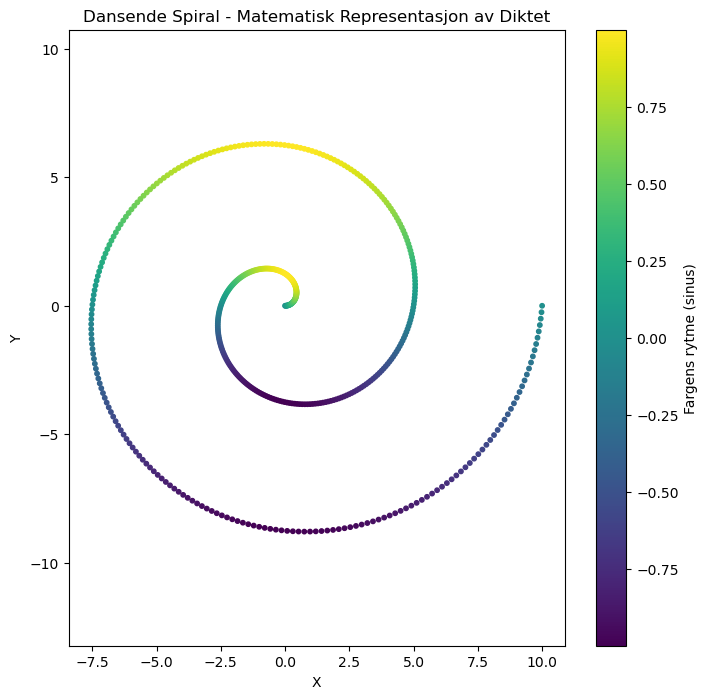

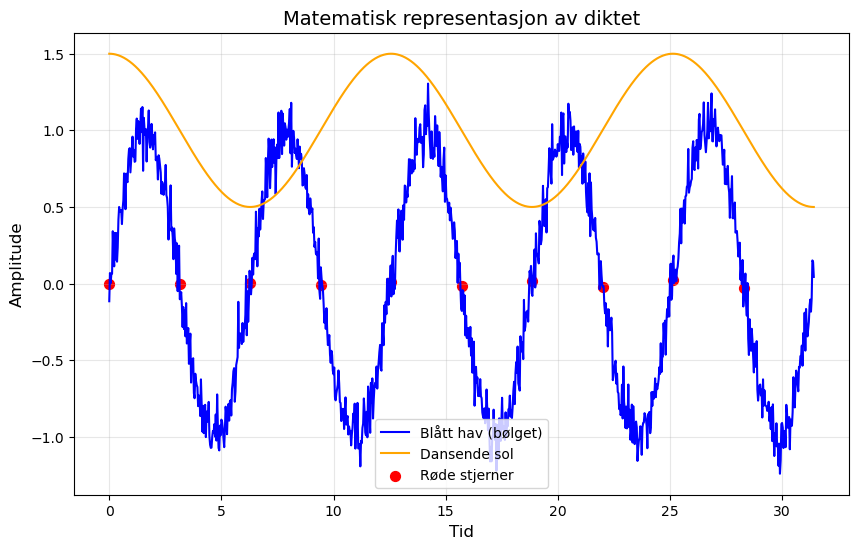

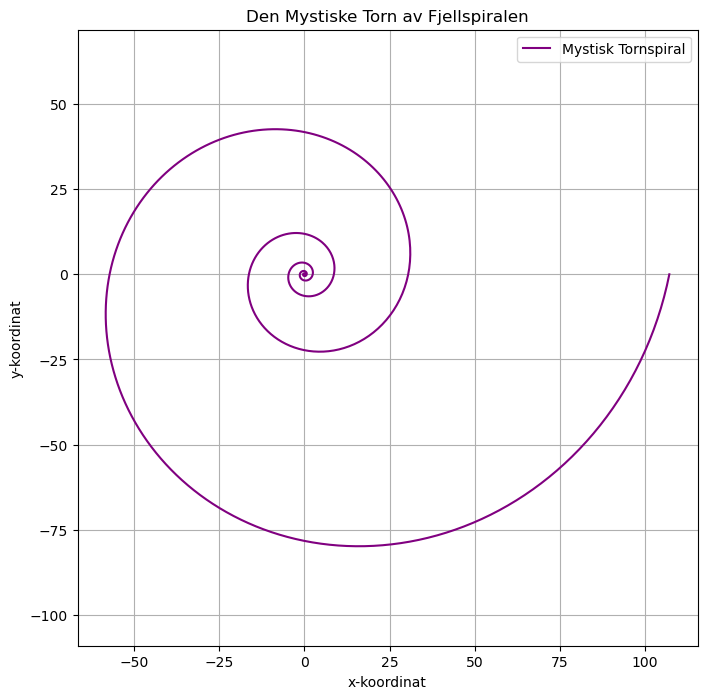

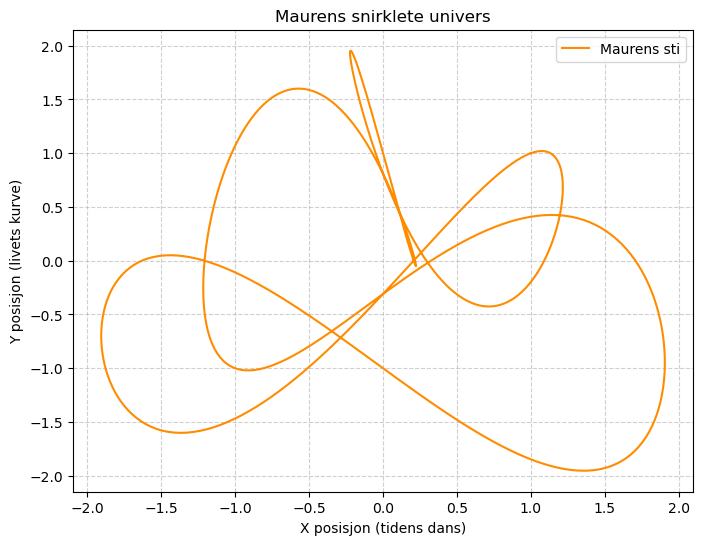

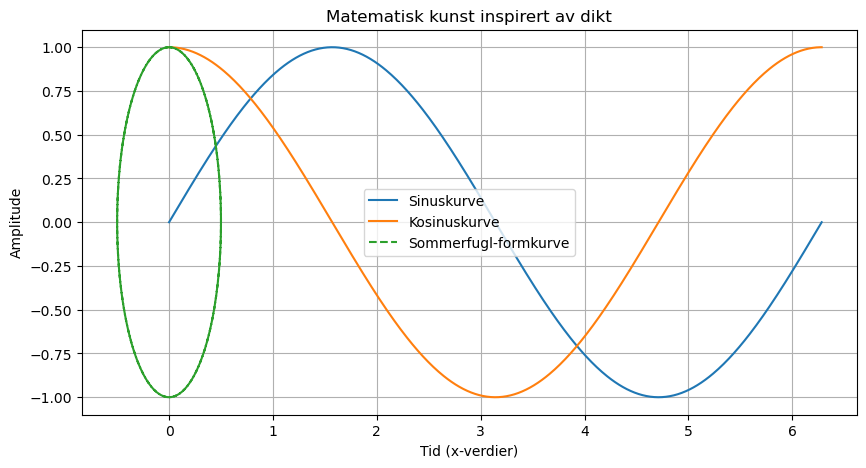

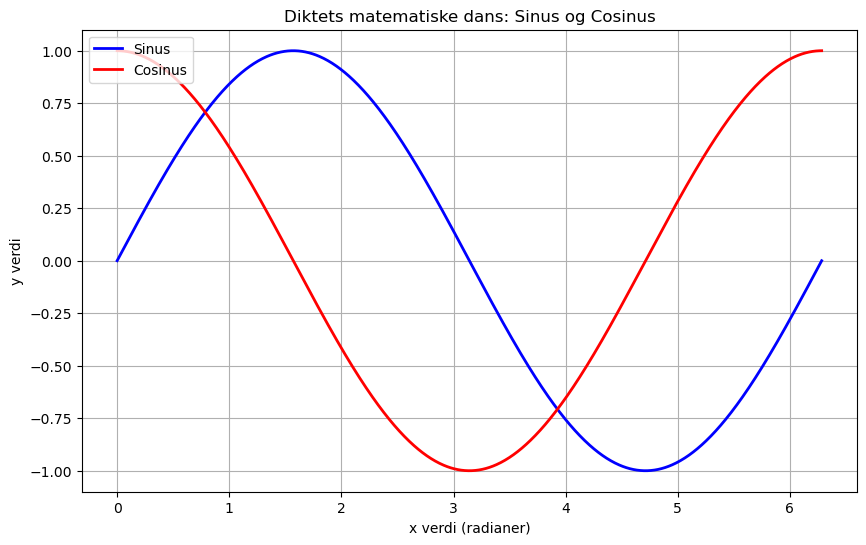

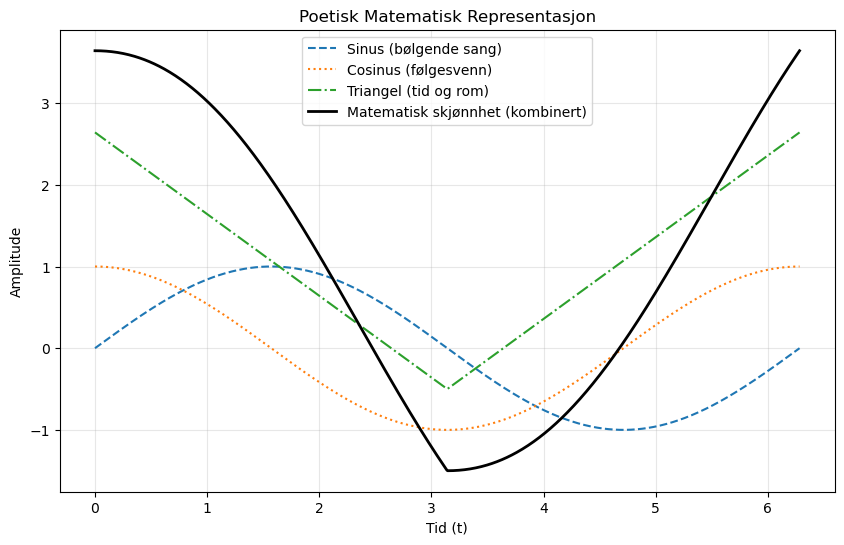

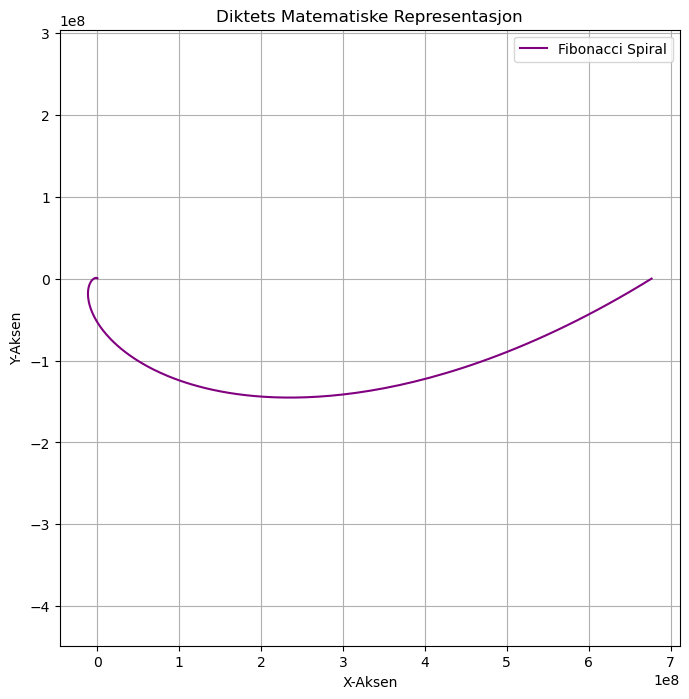

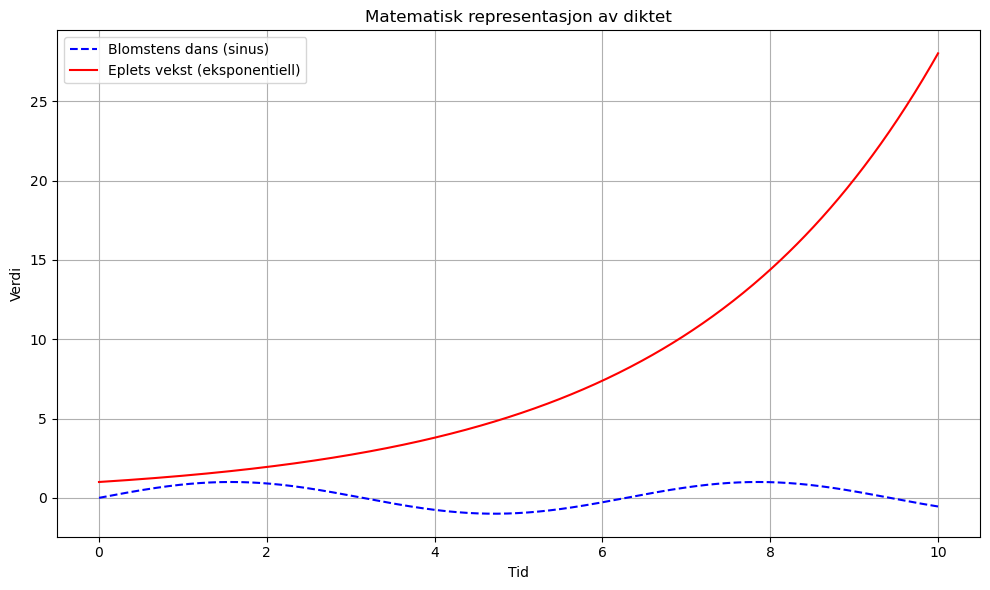

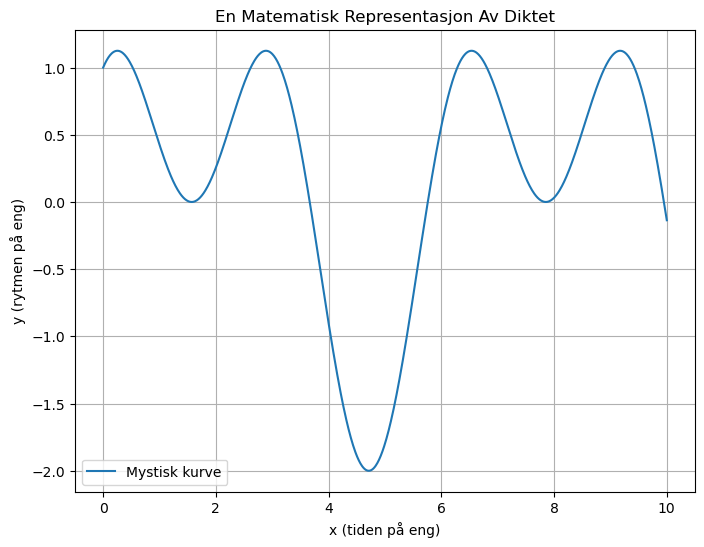

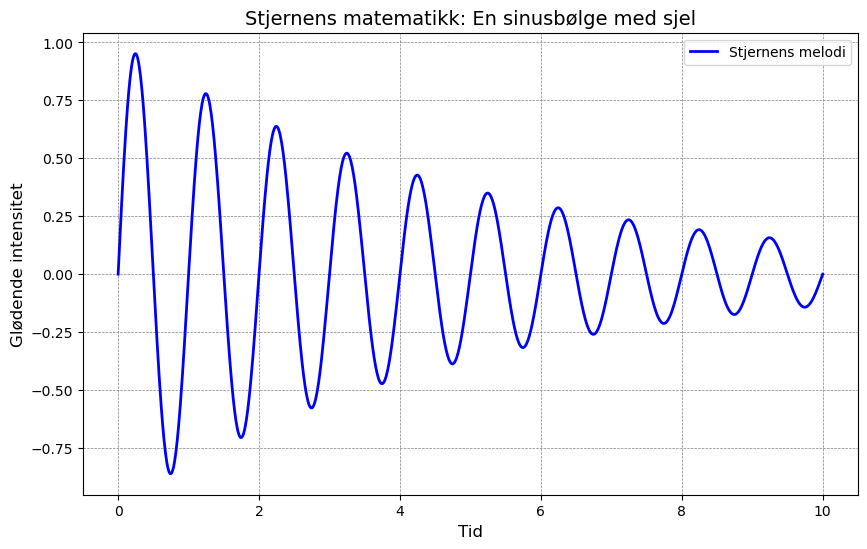

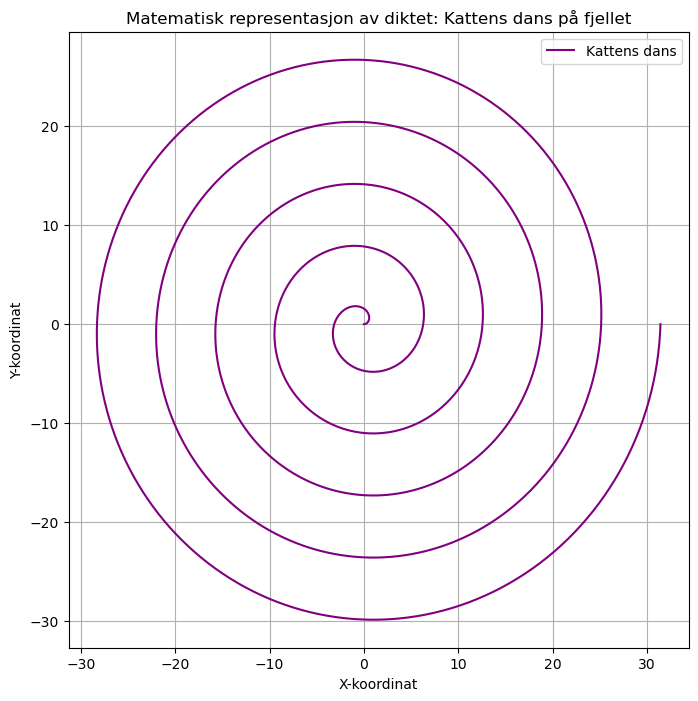

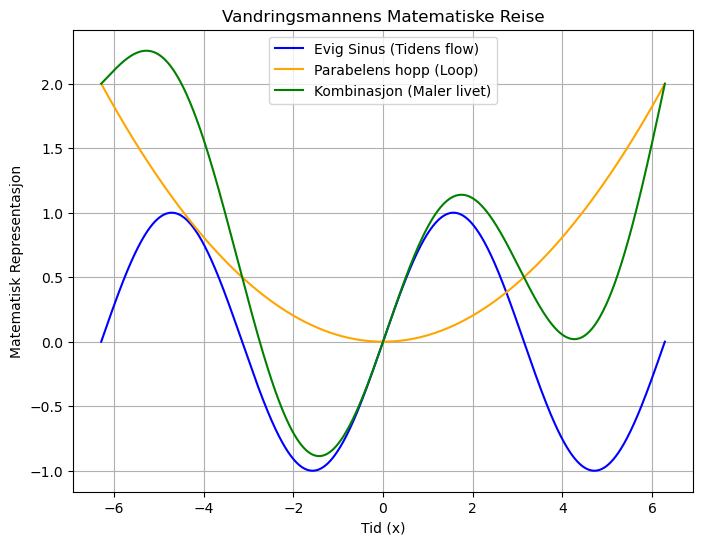

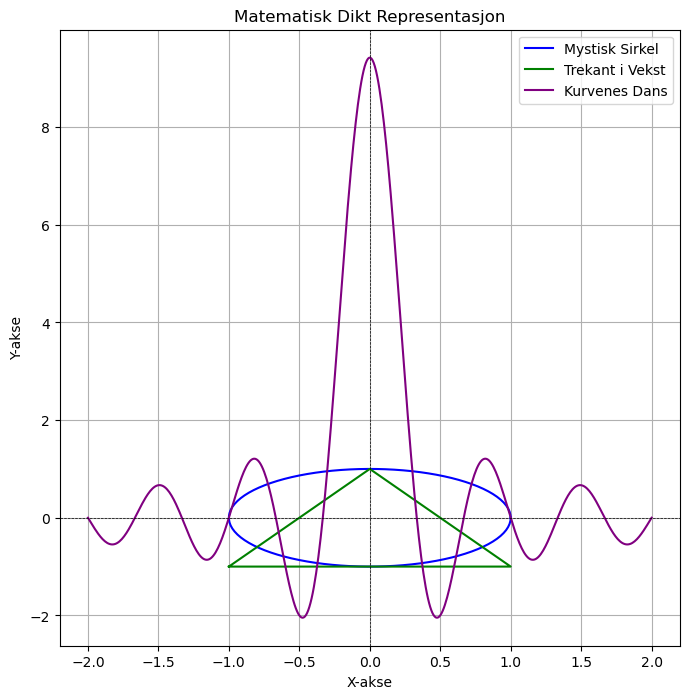

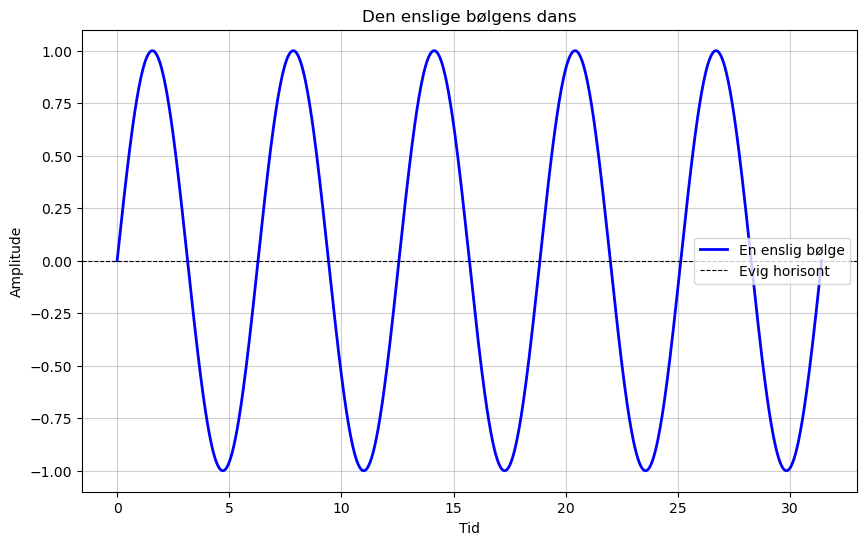

In [ ]:
from openai import OpenAI
from openai import AzureOpenAI
 
import datetime
import os
from dotenv import load_dotenv

# Import dotenv for environment variable management
# Load environment variables from .env file
load_dotenv()

def run_azure_openai_prompt(prompt, model="gpt-4o-mini"):
    
    # gets the API Key from environment variable AZURE_OPENAI_API_KEY
    client = AzureOpenAI(
        #model_id = os.environ.get("AZURE_OPENAI_MODEL"),
        azure_endpoint=os.environ.get("AZURE_OPENAI_ENDPOINT"),
        api_key=os.environ.get("AZURE_OPENAI_API_KEY"),
        api_version=os.environ.get("OPENAI_API_VERSION")  
    )

    prompt = '''
Lag et dikt om noe helt tilfeldig du finner på. Bruk diktet til å lage pythonkode som laget en matematisk representasjon av diktet og plotter. Svar strukturert på dette formatet:

TEXT: <text>

CODE: <code>
'''

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "user",
                "content": prompt,
            },
        ],
    )
    return completion.choices[0].message.content

def parse_response(response):
    """Parses the response to extract TEXT and CODE sections."""
    # Extract response text (default to original response if extraction fails)
    try:
        response_text = response.strip()
        
        # Parse the response to extract TEXT and CODE sections
        parsed_response = {}
        
        # Check if the response contains the TEXT: marker
        if "TEXT:" in response_text:
            # Split by CODE: to separate text and code
            text_parts = response_text.split("CODE:", 1)
            
            # Extract text portion (remove the TEXT: prefix and trim)
            text_content = text_parts[0].replace("TEXT:", "", 1).strip()
            parsed_response["text"] = text_content
            
            # Extract code portion if it exists
            if len(text_parts) > 1:
                code_content = text_parts[1].strip()
                # Remove triple quotes if present
                if code_content.startswith('```python') and code_content.endswith('```'):
                    code_content = code_content[9:-3].strip()
                parsed_response["code"] = code_content
        else:
            # If no structured format, treat entire response as text
            parsed_response["text"] = response_text
            parsed_response["code"] = "print('No code found')"
            
        return parsed_response
    except Exception as e:
        print(f"Error parsing response: {e}")
        return {"text": response.output_text, "code": "print('No code found')"}

def execute_python_and_save(text, code):
    """Kjører Python-koden, lagrer et bilde med dagens dato og lagrer teksten i en HTML-fil."""
    today = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
    image_filename = f"{today}.png"
    text_filename = f"{today}.html"
    
    # Kjør Python-koden
    exec_globals = {}
    code = code.replace("plt.show()", f"plt.savefig('{image_filename}')")
    
    try:
        exec(code, exec_globals)
    except Exception as e:
        print(f"Error executing code. {image_filename}")
            
    # Lagre teksten i en HTML-fil
    with open(text_filename, "w", encoding="utf-8") as file:
        # Write the text, code embedded in a pre tag, and image to HTML file
        file.write(f"""<html>
    <body>
    <h2>Dagens dikt</h2>
    <pre>{text}</pre>
    <img src='./{image_filename}' alt="Generated visualization">
    <h2>Kode</h2>
    <pre><code>{code}</code></pre>
    </body></html>""")
    
    return image_filename, text_filename

def generate_dikt():
    prompt_result = run_azure_openai_prompt("Hva er dagens nyheter?")
    print(prompt_result)
    parsed_prompt = parse_response(prompt_result)
    print('.............................')
    #print(parsed_prompt)
    text = parsed_prompt["text"]
    code = parsed_prompt["code"]
    execute_python_and_save(text, code)

for i in range(20):
    generate_dikt()
# Eksempelbruk
#if __name__ == "__main__":
    #prompt_result = run_openai_prompt("Hva er dagens nyheter?")
    #print("OpenAI Response:", prompt_result)
